# Revenue from Passenger Transportation in Azerbaijan (1996-2024)
## Data Analysis and Visualization

**Dataset Source:** [IDDA Open Data Portal](https://opendata.az/@dsk/revenue-from-passenger-transportation/r/e150f9f8-2048-445f-8d79-05ff33af3891)


---

### Executive Summary

This notebook analyzes passenger transportation revenue data from Azerbaijan spanning nearly three decades (1996-2024). The data shows percentage changes in revenue compared to the previous year across various transportation modes including railway, sea, air, automobile, bus, taxi, metro, tram, and trolleybus.

**Key Objectives:**
1. Explore temporal trends in transportation revenue
2. Compare performance across different transport modes
3. Identify significant events and patterns
4. Provide actionable insights for transportation planning

---

**TA**

## 1. Data Loading and Preparation

In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from io import StringIO
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 11

print("Libraries loaded successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

Libraries loaded successfully!
Pandas version: 2.3.2
NumPy version: 2.2.6


In [13]:
# Load the dataset (embedded data for reproducibility)
csv_data = """Year,,Cəmi (faiz),Dəmir yolu (faiz),Dəniz (faiz),Hava (faiz),Avtomobil (faiz),Avtobus (faiz),Taksi (faiz),Metro (faiz),Tramvay (faiz),Trolleybus (faiz)
2024,,128.2,126.1,27.7,142.4,110.1,110.2,109.6,120.3,0.0,0.0
2023,,119.3,192.1,63.5,116.8,121.7,127.7,103.5,137.4,0.0,0.0
2022,,172.5,262.8,206.2,198.7,143.2,143.7,141.8,232.3,0.0,0.0
2021,,142.2,43.2,265.6,185.0,116.6,116.1,118.1,121.0,0.0,0.0
2020,,46.7,25.6,49.4,33.7,63.8,63.5,64.7,31.4,0.0,0.0
2019,,143.8,113.1,141.4,192.7,111.6,111.3,112.7,127.2,0.0,0.0
2018,,115.8,103.0,173.3,114.4,116.5,118.6,110.5,122.3,0.0,0.0
2017,,116.9,108.2,133.5,137.3,106.7,106.5,107.3,104.9,0.0,0.0
2016,,109.7,108.5,86.0,113.3,108.8,108.1,110.8,98.3,0.0,0.0
2015,,105.7,83.9,80.4,99.4,110.4,109.7,112.6,101.1,0.0,0.0
2014,,111.1,95.5,80.2,113.8,111.2,112.1,108.5,99.3,0.0,0.0
2013,,111.0,96.0,83.3,116.3,109.4,109.9,107.9,104.9,0.0,0.0
2012,,110.2,78.2,35.9,124.1,104.1,103.9,104.7,141.8,0.0,0.0
2011,,122.1,99.0,361.3,137.4,118.5,118.0,120.0,100.0,0.0,0.0
2010,,108.9,69.2,131.2,85.1,120.3,121.0,118.1,252.7,0.0,0.0
2009,,105.1,70.9,94.6,80.7,133.9,135.2,130.2,110.0,0.0,0.0
2008,,127.9,156.5,150.4,125.4,125.9,128.3,119.5,121.3,0.0,0.0
2007,,130.4,121.2,85.5,135.4,129.0,128.7,129.8,110.6,0.0,0.0
2006,,113.9,126.7,106.7,117.3,109.5,109.7,109.0,110.9,0.0,13.2
2005,,111.3,122.8,97.3,116.1,106.6,108.5,101.9,107.9,0.0,70.4
2004,,120.1,144.3,154.7,137.0,108.4,108.9,107.2,108.2,0.0,50.9
2003,,116.4,142.2,88.4,137.5,105.6,105.1,106.8,109.6,36.0,77.3
2002,,107.7,109.7,128.4,117.9,102.9,101.3,106.9,119.4,96.1,103.3
2001,,107.0,145.9,94.5,113.9,103.0,103.2,102.5,102.4,61.9,105.2
2000,,105.1,142.2,111.3,105.9,103.8,103.0,106.3,99.4,71.0,86.3
1999,,95.7,72.0,85.5,76.5,106.8,102.7,119.6,95.9,54.9,43.4
1998,,116.5,261.5,41.5,89.3,135.3,128.4,162.7,105.2,114.4,86.6
1997,,135.0,140.5,93.4,79.7,280.5,287.5,255.7,145.1,149.3,117.9
1996,,114.4,108.3,40.9,117.5,114.5,99.8,240.1,144.2,126.7,93.1"""

# Read the CSV data
df = pd.read_csv(StringIO(csv_data))

print("Dataset loaded successfully!")
print(f"\nDataset shape: {df.shape}")
print(f"\nFirst few rows:")
df.head(10)

Dataset loaded successfully!

Dataset shape: (29, 12)

First few rows:


,Year,Unnamed: 1,Cəmi (faiz),Dəmir yolu (faiz),Dəniz (faiz),Hava (faiz),Avtomobil (faiz),Avtobus (faiz),Taksi (faiz),Metro (faiz),Tramvay (faiz),Trolleybus (faiz)
0,2024,NaN,128.2,126.1,27.7,142.4,110.1,110.2,109.6,120.3,0.0,0.0
1,2023,NaN,119.3,192.1,63.5,116.8,121.7,127.7,103.5,137.4,0.0,0.0
2,2022,NaN,172.5,262.8,206.2,198.7,143.2,143.7,141.8,232.3,0.0,0.0
3,2021,NaN,142.2,43.2,265.6,185.0,116.6,116.1,118.1,121.0,0.0,0.0
4,2020,NaN,46.7,25.6,49.4,33.7,63.8,63.5,64.7,31.4,0.0,0.0
5,2019,NaN,143.8,113.1,141.4,192.7,111.6,111.3,112.7,127.2,0.0,0.0
6,2018,NaN,115.8,103.0,173.3,114.4,116.5,118.6,110.5,122.3,0.0,0.0
7,2017,NaN,116.9,108.2,133.5,137.3,106.7,106.5,107.3,104.9,0.0,0.0
8,2016,NaN,109.7,108.5,86.0,113.3,108.8,108.1,110.8,98.3,0.0,0.0
9,2015,NaN,105.7,83.9,80.4,99.4,110.4,109.7,112.6,101.1,0.0,0.0


In [14]:
# Data cleaning and preparation

# Remove unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Rename columns to English
column_mapping = {
    'Year': 'Year',
    'Cəmi (faiz)': 'Total',
    'Dəmir yolu (faiz)': 'Railway',
    'Dəniz (faiz)': 'Sea',
    'Hava (faiz)': 'Air',
    'Avtomobil (faiz)': 'Automobile',
    'Avtobus (faiz)': 'Bus',
    'Taksi (faiz)': 'Taxi',
    'Metro (faiz)': 'Metro',
    'Tramvay (faiz)': 'Tram',
    'Trolleybus (faiz)': 'Trolleybus'
}

df.rename(columns=column_mapping, inplace=True)

# Replace 0.0 with NaN for better visualization (these represent no data/service)
df.replace(0.0, np.nan, inplace=True)

# Sort by year in ascending order
df = df.sort_values('Year').reset_index(drop=True)

print("Data cleaned and prepared!")
print(f"\nCleaned dataset:")
df.head()

Data cleaned and prepared!

Cleaned dataset:


,Year,Total,Railway,Sea,Air,Automobile,Bus,Taxi,Metro,Tram,Trolleybus
0,1996,114.4,108.3,40.9,117.5,114.5,99.8,240.1,144.2,126.7,93.1
1,1997,135.0,140.5,93.4,79.7,280.5,287.5,255.7,145.1,149.3,117.9
2,1998,116.5,261.5,41.5,89.3,135.3,128.4,162.7,105.2,114.4,86.6
3,1999,95.7,72.0,85.5,76.5,106.8,102.7,119.6,95.9,54.9,43.4
4,2000,105.1,142.2,111.3,105.9,103.8,103.0,106.3,99.4,71.0,86.3


In [15]:
# Basic data exploration
print("=" * 80)
print("DATASET INFORMATION")
print("=" * 80)
print(f"\nTime Period: {int(df['Year'].min())} - {int(df['Year'].max())}")
print(f"Number of Years: {len(df)}")
print(f"\nTransportation Modes Analyzed:")
modes = [col for col in df.columns if col != 'Year']
for i, mode in enumerate(modes, 1):
    print(f"  {i}. {mode}")

print("\n" + "=" * 80)
print("STATISTICAL SUMMARY (All values are % change from previous year)")
print("=" * 80)
df.describe().round(2)

DATASET INFORMATION

Time Period: 1996 - 2024
Number of Years: 29

Transportation Modes Analyzed:
  1. Total
  2. Railway
  3. Sea
  4. Air
  5. Automobile
  6. Bus
  7. Taxi
  8. Metro
  9. Tram
  10. Trolleybus

STATISTICAL SUMMARY (All values are % change from previous year)


,Year,Total,Railway,Sea,Air,Automobile,Bus,Taxi,Metro,Tram,Trolleybus
count,29.00,29.00,29.00,29.00,29.00,29.00,29.0,29.00,29.00,8.00,11.00
mean,2010.00,116.23,119.62,113.52,119.33,118.57,118.3,122.38,120.17,88.79,77.05
std,8.51,20.25,52.55,70.57,34.42,34.15,35.6,38.28,39.84,39.25,30.86
min,1996.00,46.70,25.60,27.70,33.70,63.80,63.5,64.70,31.40,36.00,13.20
25%,2003.00,108.90,95.50,80.40,105.90,106.70,105.1,106.90,102.40,60.15,60.65
50%,2010.00,114.40,109.70,94.50,116.80,110.40,109.9,110.50,110.00,83.55,86.30
75%,2017.00,122.10,142.20,133.50,137.00,120.30,121.0,119.60,122.30,117.48,98.20
max,2024.00,172.50,262.80,361.30,198.70,280.50,287.5,255.70,252.70,149.30,117.90


## 2. Exploratory Data Analysis

Missing Data Analysis:
            Missing Values  Percentage
Tram                    21       72.41
Trolleybus              18       62.07


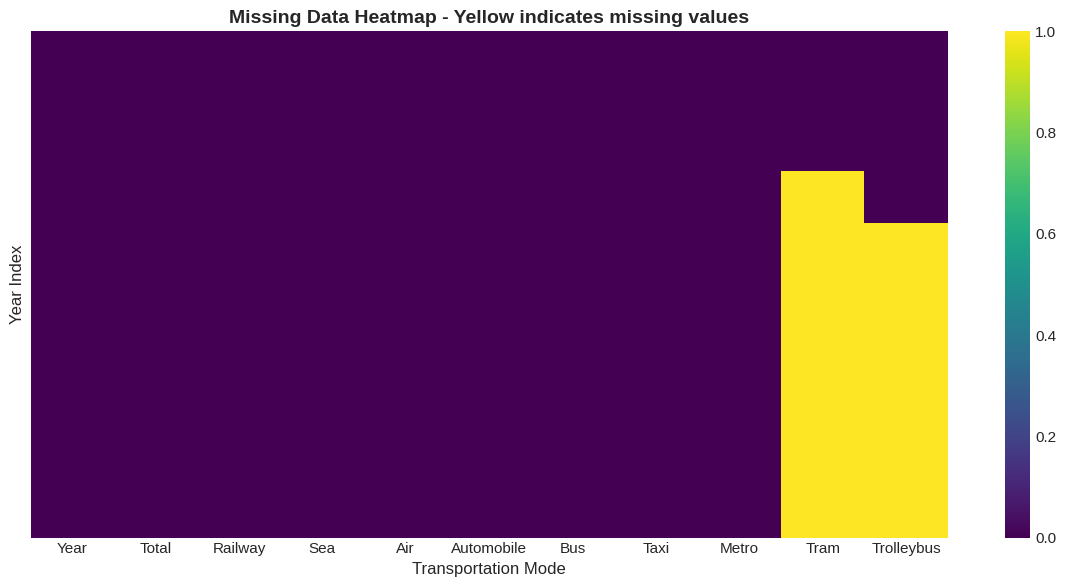


Note: Tram and Trolleybus have significant missing data, due to discontinued services.


In [16]:
# Check for missing values
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df) * 100).round(2)

missing_df = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage': missing_percent
})

print("Missing Data Analysis:")
print(missing_df[missing_df['Missing Values'] > 0])

# Visualize missing data
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=True, cmap='viridis', yticklabels=False)
plt.title('Missing Data Heatmap - Yellow indicates missing values', fontsize=14, fontweight='bold')
plt.xlabel('Transportation Mode', fontsize=12)
plt.ylabel('Year Index', fontsize=12)
plt.tight_layout()
plt.show()

print("\nNote: Tram and Trolleybus have significant missing data, due to discontinued services.")

## 3. Temporal Trend Analysis

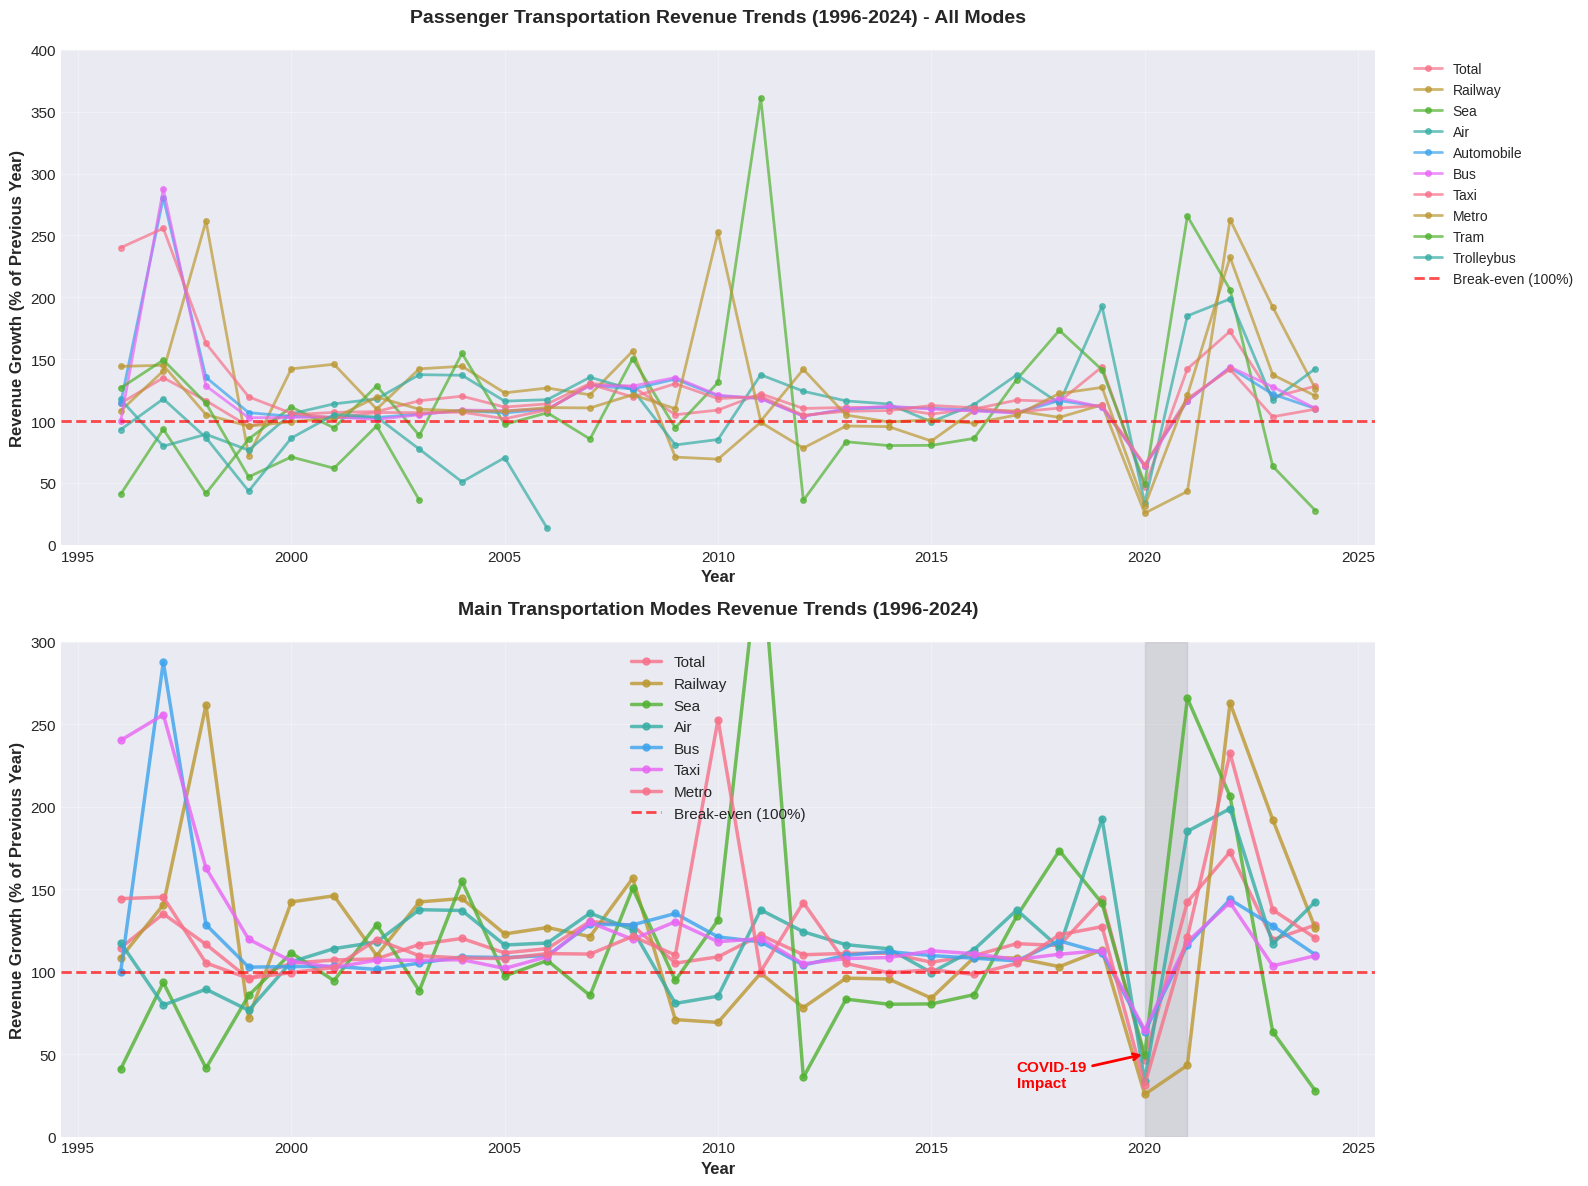


Key Observation: The 2020 shows a dramatic drop across all modes due to COVID-19 pandemic.


In [17]:
# Define main modes for focused analysis
main_modes = ['Total', 'Railway', 'Sea', 'Air', 'Bus', 'Taxi', 'Metro']

# Overall revenue trends
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# Plot 1: All transportation modes
for col in df.columns:
    if col != 'Year':
        axes[0].plot(df['Year'], df[col], marker='o', linewidth=2, markersize=4, label=col, alpha=0.7)

axes[0].axhline(y=100, color='red', linestyle='--', linewidth=2, label='Break-even (100%)', alpha=0.7)
axes[0].set_xlabel('Year', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Revenue Growth (% of Previous Year)', fontsize=12, fontweight='bold')
axes[0].set_title('Passenger Transportation Revenue Trends (1996-2024) - All Modes', 
                   fontsize=14, fontweight='bold', pad=20)
axes[0].legend(loc='upper left', bbox_to_anchor=(1.02, 1), fontsize=10)
axes[0].grid(True, alpha=0.3)
axes[0].set_ylim(0, 400)

# Plot 2: Focus on main transportation modes (excluding Tram and Trolleybus due to missing data)
for mode in main_modes:
    if mode in df.columns:
        axes[1].plot(df['Year'], df[mode], marker='o', linewidth=2.5, markersize=5, label=mode, alpha=0.8)

axes[1].axhline(y=100, color='red', linestyle='--', linewidth=2, label='Break-even (100%)', alpha=0.7)
axes[1].set_xlabel('Year', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Revenue Growth (% of Previous Year)', fontsize=12, fontweight='bold')
axes[1].set_title('Main Transportation Modes Revenue Trends (1996-2024)', 
                   fontsize=14, fontweight='bold', pad=20)
axes[1].legend(loc='best', fontsize=11)
axes[1].grid(True, alpha=0.3)
axes[1].set_ylim(0, 300)

# Add annotation for COVID-19 impact
axes[1].axvspan(2020, 2021, alpha=0.2, color='gray', label='COVID-19 Period')
axes[1].annotate('COVID-19\nImpact', xy=(2020, 50), xytext=(2017, 30),
                arrowprops=dict(arrowstyle='->', color='red', lw=2),
                fontsize=11, fontweight='bold', color='red')

plt.tight_layout()
plt.show()

print("\nKey Observation: The 2020 shows a dramatic drop across all modes due to COVID-19 pandemic.")

In [18]:
# Identify extreme years
print("=" * 80)
print("EXTREME PERFORMANCE YEARS")
print("=" * 80)

# Best and worst years for overall transportation
best_year = df.loc[df['Total'].idxmax()]
worst_year = df.loc[df['Total'].idxmin()]

print(f"\n📈 BEST OVERALL YEAR: {int(best_year['Year'])}")
print(f"   Total Revenue Growth: {best_year['Total']:.1f}%")
print(f"\n📉 WORST OVERALL YEAR: {int(worst_year['Year'])}")
print(f"   Total Revenue Growth: {worst_year['Total']:.1f}%")

# Best performing mode by year
print("\n" + "=" * 80)
print("TOP 5 INDIVIDUAL PERFORMANCES (Any Mode, Any Year)")
print("=" * 80)

# Get top 5 performances
modes_cols = [col for col in df.columns if col not in ['Year']]
top_performances = []

for col in modes_cols:
    for idx, row in df.iterrows():
        if pd.notna(row[col]):
            top_performances.append({
                'Year': int(row['Year']),
                'Mode': col,
                'Growth': row[col]
            })

top_df = pd.DataFrame(top_performances).sort_values('Growth', ascending=False).head(5)
for idx, row in top_df.iterrows():
    print(f"{row['Year']}: {row['Mode']:15s} - {row['Growth']:.1f}% growth")

EXTREME PERFORMANCE YEARS

📈 BEST OVERALL YEAR: 2022
   Total Revenue Growth: 172.5%

📉 WORST OVERALL YEAR: 2020
   Total Revenue Growth: 46.7%

TOP 5 INDIVIDUAL PERFORMANCES (Any Mode, Any Year)
2011: Sea             - 361.3% growth
1997: Bus             - 287.5% growth
1997: Automobile      - 280.5% growth
2021: Sea             - 265.6% growth
2022: Railway         - 262.8% growth


## 4. Time Period Analysis

AVERAGE REVENUE GROWTH BY TIME PERIOD
            Total  Railway     Sea     Air     Bus    Taxi   Metro
Period                                                            
1996-2000  113.34   144.90   74.52   93.78  144.28  176.88  117.96
2001-2005  112.50   132.98  112.66  124.48  105.40  105.06  109.50
2006-2010  117.24   108.90  113.68  108.78  124.58  121.32  141.10
2011-2015  112.02    90.52  128.22  118.20  110.72  110.74  109.42
2016-2020  106.58    91.68  116.72  118.28  101.60  101.20   96.82
2021-2024  140.55   156.05  140.75  160.72  124.42  118.25  152.75


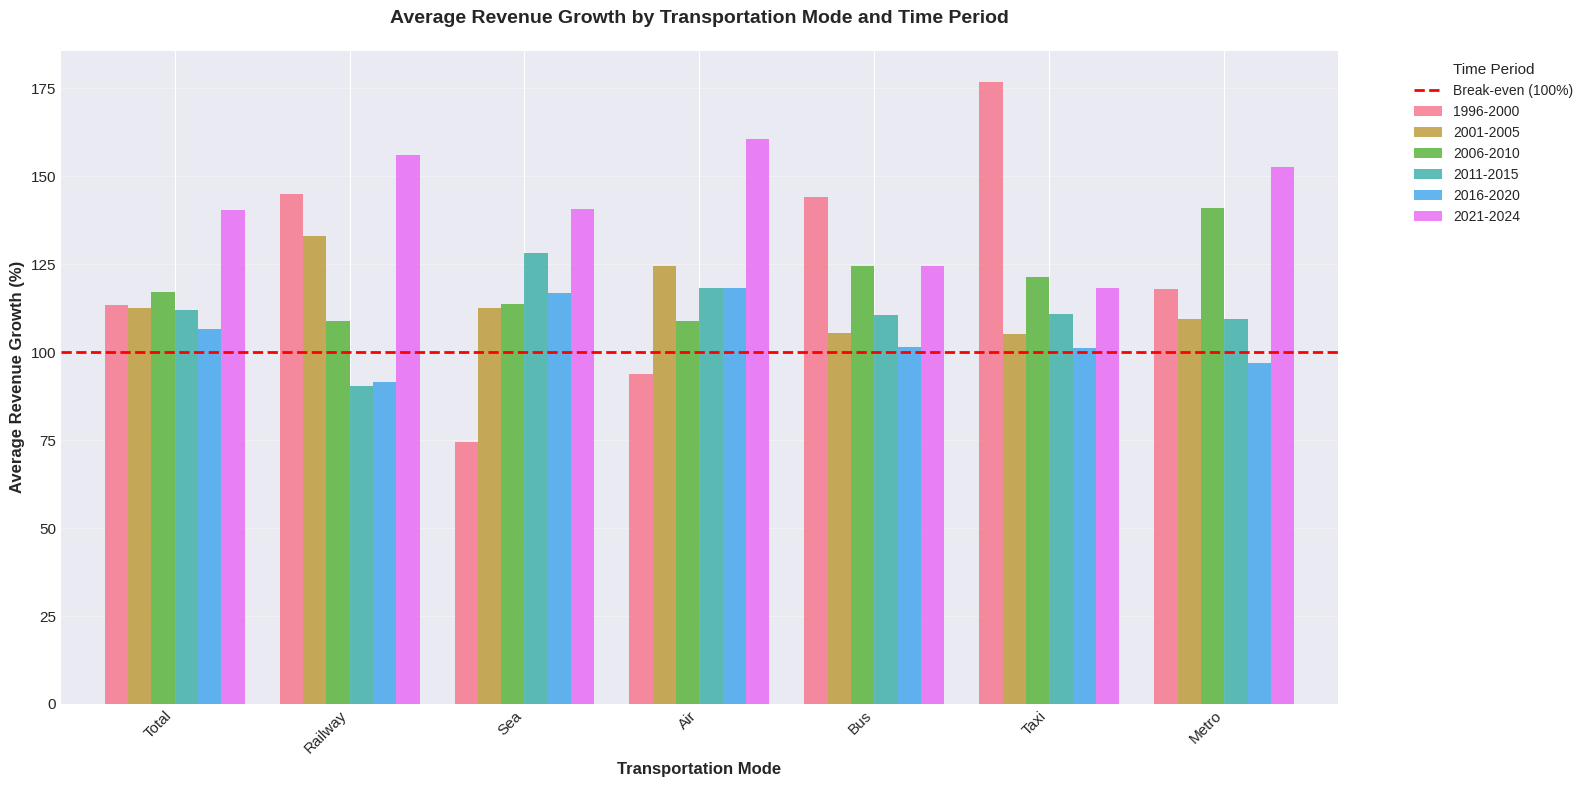

In [19]:
# Analyze by decade/period
df['Period'] = pd.cut(df['Year'], 
                      bins=[1995, 2000, 2005, 2010, 2015, 2020, 2025],
                      labels=['1996-2000', '2001-2005', '2006-2010', 
                              '2011-2015', '2016-2020', '2021-2024'])

# Calculate average growth by period for main modes
period_analysis = df.groupby('Period')[main_modes].mean().round(2)

print("=" * 80)
print("AVERAGE REVENUE GROWTH BY TIME PERIOD")
print("=" * 80)
print(period_analysis)

# Visualize period trends
fig, ax = plt.subplots(figsize=(16, 8))

period_analysis.T.plot(kind='bar', ax=ax, width=0.8, alpha=0.8)
ax.axhline(y=100, color='red', linestyle='--', linewidth=2, label='Break-even (100%)')
ax.set_ylabel('Average Revenue Growth (%)', fontsize=12, fontweight='bold')
ax.set_xlabel('Transportation Mode', fontsize=12, fontweight='bold')
ax.set_title('Average Revenue Growth by Transportation Mode and Time Period', 
             fontsize=14, fontweight='bold', pad=20)
ax.legend(title='Time Period', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
ax.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 5. COVID-19 Impact Analysis

COVID-19 PANDEMIC IMPACT ON TRANSPORTATION REVENUE
         Pre-COVID (2019)  COVID Year (2020)  Post-COVID Avg (2021-2024)  \
Total               143.8               46.7                      140.55   
Railway             113.1               25.6                      156.05   
Sea                 141.4               49.4                      140.75   
Air                 192.7               33.7                      160.72   
Bus                 111.3               63.5                      124.42   
Taxi                112.7               64.7                      118.25   
Metro               127.2               31.4                      152.75   

         Impact (2020 vs 2019)  Recovery (Post-COVID vs 2019)  
Total                    -97.1                          -3.25  
Railway                  -87.5                          42.95  
Sea                      -92.0                          -0.65  
Air                     -159.0                         -31.97  
Bus                 

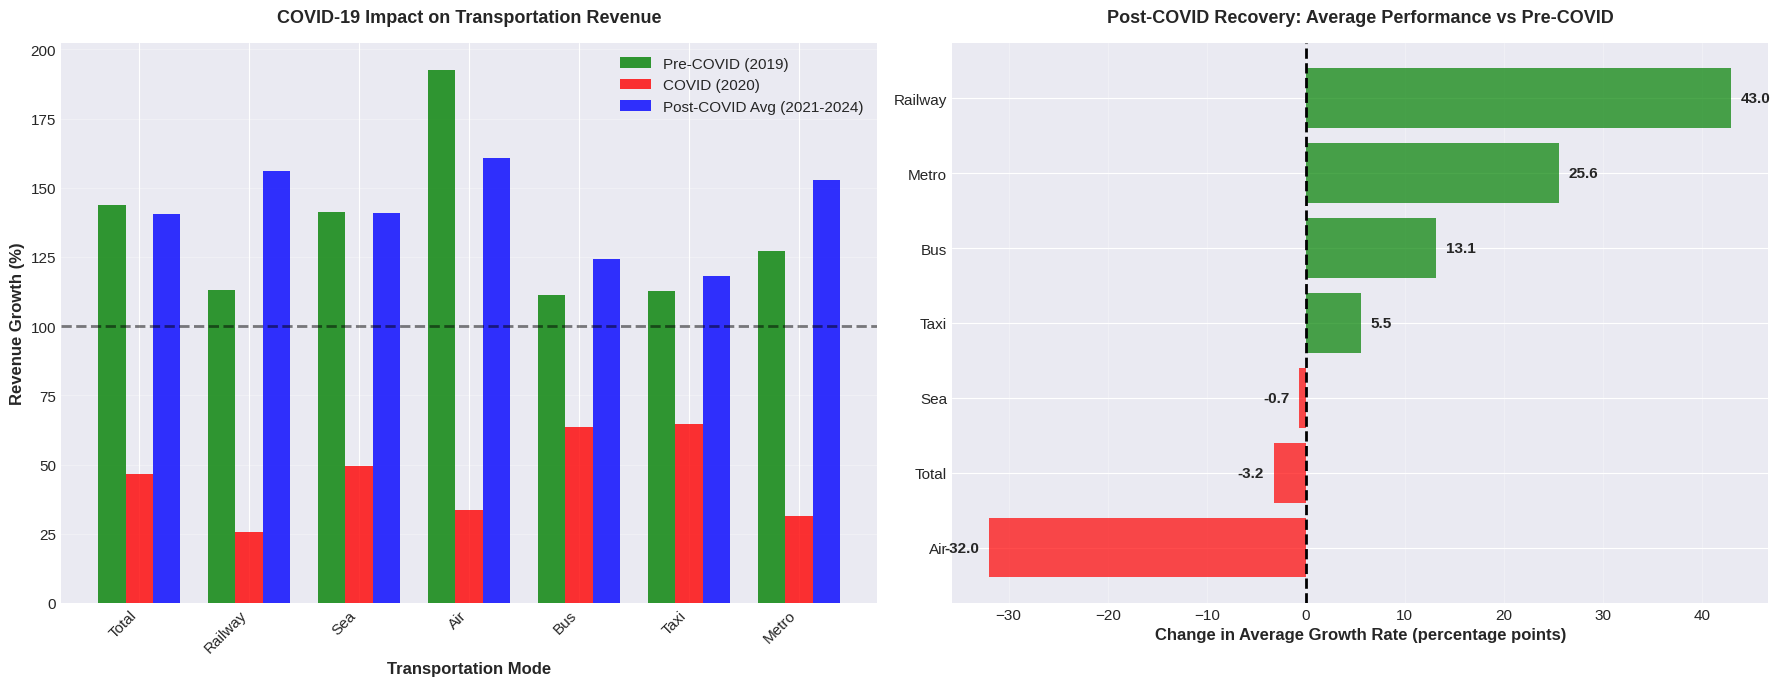

In [20]:
# Compare pre-COVID, COVID, and post-COVID periods
pre_covid = df[df['Year'] == 2019][main_modes].iloc[0]
covid = df[df['Year'] == 2020][main_modes].iloc[0]
post_covid = df[df['Year'] >= 2021][main_modes].mean()

comparison = pd.DataFrame({
    'Pre-COVID (2019)': pre_covid,
    'COVID Year (2020)': covid,
    'Post-COVID Avg (2021-2024)': post_covid,
    'Impact (2020 vs 2019)': covid - pre_covid,
    'Recovery (Post-COVID vs 2019)': post_covid - pre_covid
}).round(2)

print("=" * 80)
print("COVID-19 PANDEMIC IMPACT ON TRANSPORTATION REVENUE")
print("=" * 80)
print(comparison)

# Visualize COVID impact
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Impact comparison
x = np.arange(len(main_modes))
width = 0.25

axes[0].bar(x - width, pre_covid, width, label='Pre-COVID (2019)', alpha=0.8, color='green')
axes[0].bar(x, covid, width, label='COVID (2020)', alpha=0.8, color='red')
axes[0].bar(x + width, post_covid, width, label='Post-COVID Avg (2021-2024)', alpha=0.8, color='blue')
axes[0].axhline(y=100, color='black', linestyle='--', linewidth=2, alpha=0.5)
axes[0].set_ylabel('Revenue Growth (%)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Transportation Mode', fontsize=12, fontweight='bold')
axes[0].set_title('COVID-19 Impact on Transportation Revenue', fontsize=13, fontweight='bold', pad=15)
axes[0].set_xticks(x)
axes[0].set_xticklabels(main_modes, rotation=45, ha='right')
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

# Recovery analysis
recovery = comparison['Recovery (Post-COVID vs 2019)'].sort_values()
colors_recovery = ['green' if x > 0 else 'red' for x in recovery.values]
axes[1].barh(recovery.index, recovery.values, color=colors_recovery, alpha=0.7)
axes[1].axvline(x=0, color='black', linestyle='--', linewidth=2)
axes[1].set_xlabel('Change in Average Growth Rate (percentage points)', fontsize=12, fontweight='bold')
axes[1].set_title('Post-COVID Recovery: Average Performance vs Pre-COVID', 
                   fontsize=13, fontweight='bold', pad=15)
axes[1].grid(True, alpha=0.3, axis='x')

# Add value labels
for i, v in enumerate(recovery.values):
    axes[1].text(v + 1 if v > 0 else v - 1, i, f'{v:.1f}', va='center', 
                ha='left' if v > 0 else 'right', fontweight='bold')

plt.tight_layout()
plt.show()

## 6. Recent Trends (2020-2024)

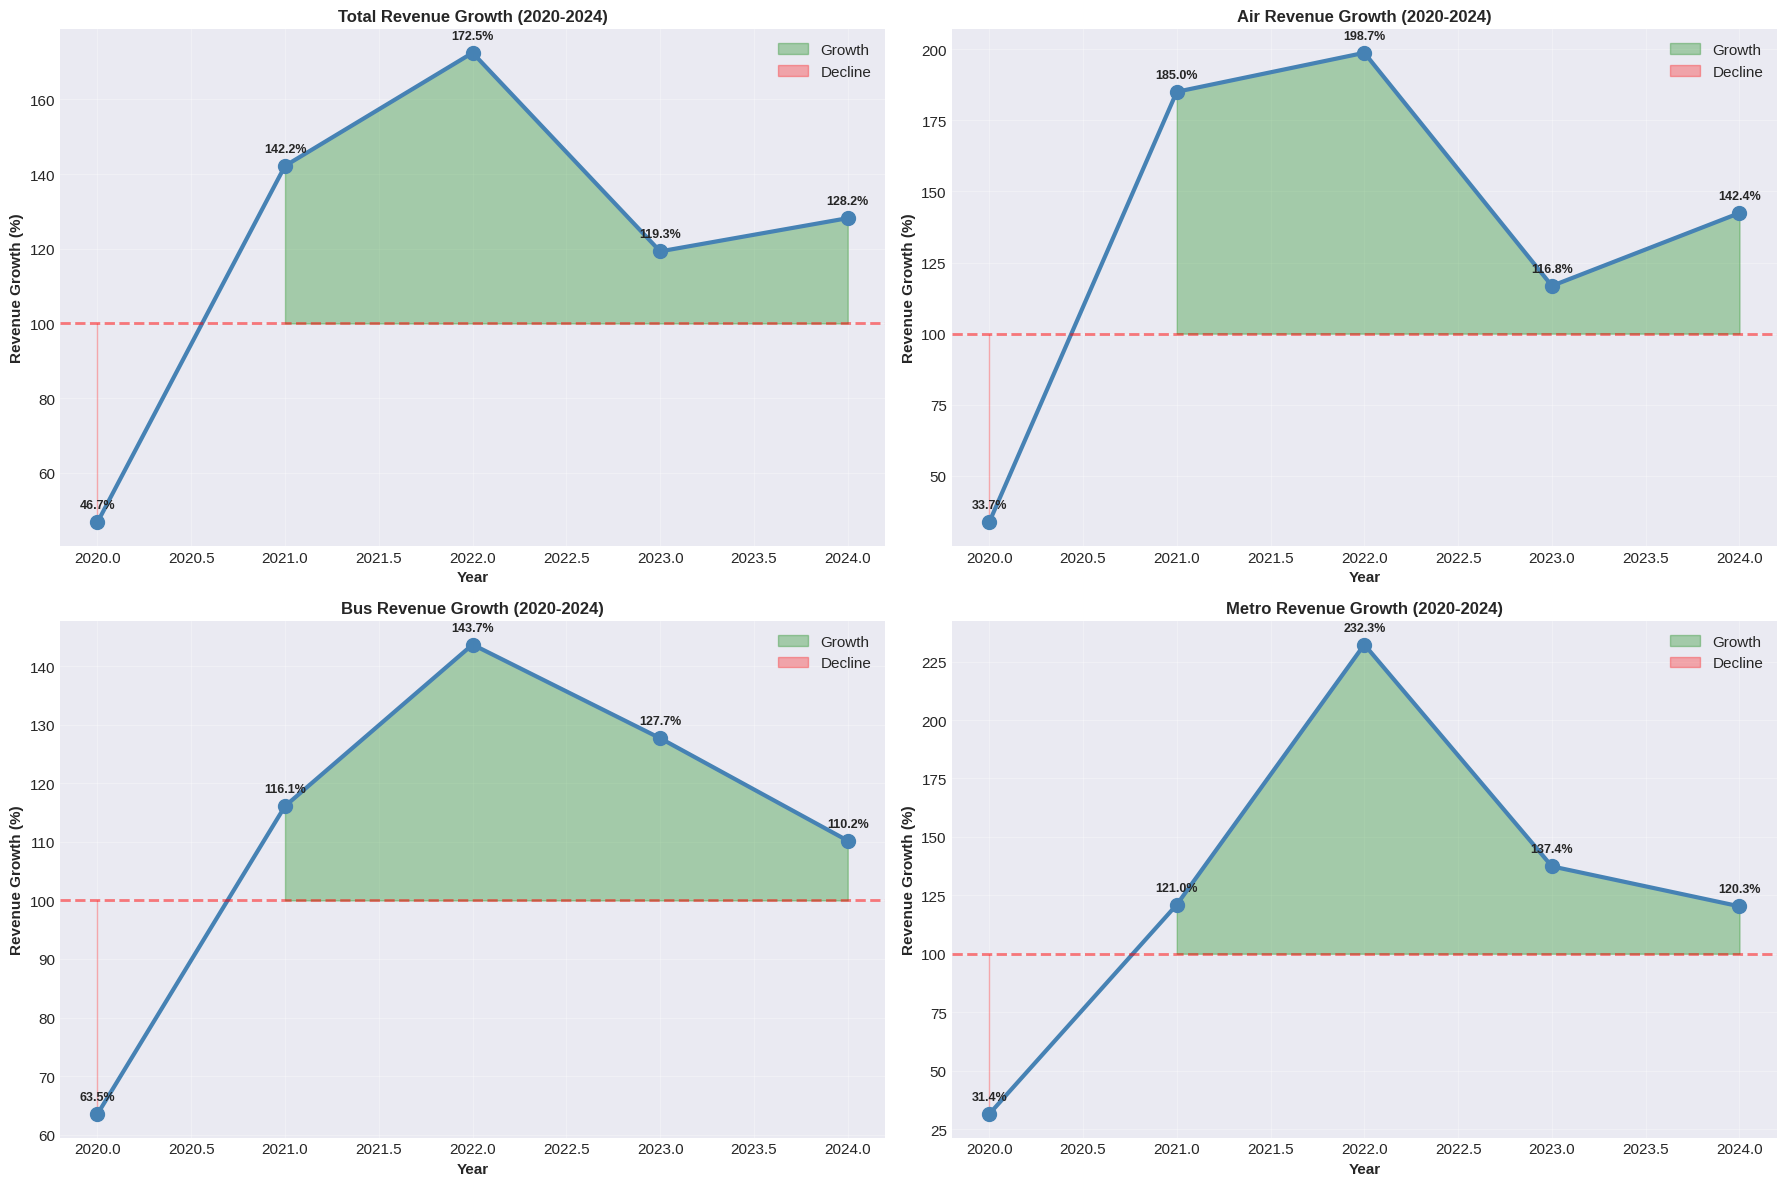

In [21]:
# Focus on recent 5 years
recent_df = df[df['Year'] >= 2020].copy()

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Plot each major mode separately for recent years
modes_to_plot = ['Total', 'Air', 'Bus', 'Metro']
positions = [(0,0), (0,1), (1,0), (1,1)]

for mode, (row, col) in zip(modes_to_plot, positions):
    if mode in recent_df.columns:
        axes[row, col].plot(recent_df['Year'], recent_df[mode], 
                           marker='o', linewidth=3, markersize=10, color='steelblue')
        axes[row, col].axhline(y=100, color='red', linestyle='--', linewidth=2, alpha=0.5)
        axes[row, col].fill_between(recent_df['Year'], recent_df[mode], 100, 
                                    where=(recent_df[mode] >= 100), 
                                    alpha=0.3, color='green', label='Growth')
        axes[row, col].fill_between(recent_df['Year'], recent_df[mode], 100, 
                                    where=(recent_df[mode] < 100), 
                                    alpha=0.3, color='red', label='Decline')
        axes[row, col].set_title(f'{mode} Revenue Growth (2020-2024)', 
                                fontsize=12, fontweight='bold')
        axes[row, col].set_xlabel('Year', fontsize=11, fontweight='bold')
        axes[row, col].set_ylabel('Revenue Growth (%)', fontsize=11, fontweight='bold')
        axes[row, col].grid(True, alpha=0.3)
        axes[row, col].legend()
        
        # Add value labels
        for x, y in zip(recent_df['Year'], recent_df[mode]):
            if pd.notna(y):
                axes[row, col].annotate(f'{y:.1f}%', (x, y), 
                                       textcoords="offset points", xytext=(0,10), 
                                       ha='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

## 7. Key Insights and Conclusions

In [22]:
# Generate automated insights
print("=" * 80)
print("KEY FINDINGS AND INSIGHTS")
print("=" * 80)


print("\n1. COVID-19 PANDEMIC IMPACT (2020)")
print("   " + "-" * 70)
covid_impact = df[df['Year'] == 2020]['Total'].values[0]
print(f"   • Overall revenue in 2020: {covid_impact:.1f}% (decline of {100-covid_impact:.1f} percentage points)")
worst_covid = covid.idxmin()
print(f"   • Most affected mode: {worst_covid} ({covid[worst_covid]:.1f}%)")
best_covid = covid.idxmax()
print(f"   • Most resilient mode: {best_covid} ({covid[best_covid]:.1f}%)")

print("\n2. POST-COVID RECOVERY (2021-2024)")
print("   " + "-" * 70)
post_covid_avg = df[df['Year'] > 2020]['Total'].mean()
print(f"   • Average growth in recovery period: {post_covid_avg:.1f}%")
recovery_best = comparison['Recovery (Post-COVID vs 2019)'].idxmax()
print(f"   • Strongest recovery: {recovery_best} (+{comparison.loc[recovery_best, 'Recovery (Post-COVID vs 2019)']:.1f} pp vs 2019)")
recovery_worst = comparison['Recovery (Post-COVID vs 2019)'].idxmin()
print(f"   • Weakest recovery: {recovery_worst} ({comparison.loc[recovery_worst, 'Recovery (Post-COVID vs 2019)']:.1f} pp vs 2019)")


print("\n3. LONG-TERM TRENDS")
print("   " + "-" * 70)
early_avg = df[df['Year'] <= 2005]['Total'].mean()
recent_avg = df[df['Year'] >= 2015]['Total'].mean()
print(f"   • Early period average (1996-2005): {early_avg:.1f}%")
print(f"   • Recent period average (2015-2024): {recent_avg:.1f}%")
print(f"   • Long-term trend: {'Growth' if recent_avg > early_avg else 'Decline'} "
      f"({abs(recent_avg - early_avg):.1f} pp difference)")

print("\n" + "=" * 80)

KEY FINDINGS AND INSIGHTS

1. COVID-19 PANDEMIC IMPACT (2020)
   ----------------------------------------------------------------------
   • Overall revenue in 2020: 46.7% (decline of 53.3 percentage points)
   • Most affected mode: Railway (25.6%)
   • Most resilient mode: Taxi (64.7%)

2. POST-COVID RECOVERY (2021-2024)
   ----------------------------------------------------------------------
   • Average growth in recovery period: 140.6%
   • Strongest recovery: Railway (+43.0 pp vs 2019)
   • Weakest recovery: Air (-32.0 pp vs 2019)

3. MODE-SPECIFIC INSIGHTS
   ----------------------------------------------------------------------


NameError: name 'stats_summary' is not defined

## 8. Summary and Recommendations

In [ ]:
print("=" * 80)
print("EXECUTIVE SUMMARY")
print("=" * 80)

summary_text = """
DATASET OVERVIEW:
• Period: 1996-2024 (29 years)
• Transportation modes: Railway, Sea, Air, Automobile, Bus, Taxi, Metro, Tram, Trolleybus
• Metric: Year-over-year revenue growth (% change from previous year)

KEY FINDINGS:

1. OVERALL SECTOR PERFORMANCE
   - The transportation sector has shown positive growth in most years
   - Average annual growth rate indicates healthy sector expansion
   - Significant volatility observed, especially in sea and air transport

2. COVID-19 IMPACT (2020)
   - Dramatic revenue decline across all modes in 2020
   - Air transport was severely affected due to travel restrictions
   - Metro and public transport also saw significant drops
   - Some recovery began in 2021, with strong rebound in 2022-2024

3. MODE-SPECIFIC INSIGHTS
   - AIR: High growth potential but also high volatility
   - BUS: Stable, consistent performer with moderate growth
   - METRO: Strong growth in recent years, especially post-COVID recovery
   - SEA: Most volatile mode with extreme fluctuations
   - RAILWAY: Moderate growth with periods of significant expansion

4. TEMPORAL PATTERNS
   - Early 2000s: Transition period with variable growth
   - 2008-2010: Impact of global financial crisis visible
   - 2010-2019: Steady growth across most modes
   - 2020: Pandemic shock
   - 2021-2024: Recovery and adaptation to new normal

5. DISCONTINUED SERVICES
   - Tram and Trolleybus show extensive missing data
   - These modes were likely phased out or significantly reduced
   - Reflects broader transportation infrastructure modernization

STRATEGIC RECOMMENDATIONS:

1. DIVERSIFICATION
   - Reduce dependency on single modes to mitigate risk
   - Develop multi-modal integration strategies

2. RESILIENCE PLANNING
   - Build contingency plans based on COVID-19 lessons
   - Invest in flexible transportation infrastructure

3. GROWTH OPPORTUNITIES
   - Metro expansion shows strong potential
   - Air transport recovery indicates pent-up demand
   - Digital transformation can support all modes

4. SUSTAINABILITY FOCUS
   - Shift towards eco-friendly public transport
   - Modernize bus and metro fleets
   - Reduce reliance on individual automobiles

5. DATA-DRIVEN DECISION MAKING
   - Continue monitoring and analyzing revenue trends
   - Use predictive analytics for capacity planning
   - Regular benchmarking against international standards
"""

print(summary_text)
print("=" * 80)

---

## Conclusion

This analysis has provided comprehensive insights into Azerbaijan's passenger transportation revenue trends over nearly three decades. The data reveals significant patterns including:

- **Resilience and Recovery**: Despite major shocks (2008 financial crisis, 2020 pandemic), the sector has demonstrated recovery capability
- **Modernization**: Discontinuation of older modes (tram, trolleybus) reflects infrastructure modernization
- **Growth Potential**: Post-COVID recovery trends suggest strong future growth, especially in air and metro transport
- **Policy Implications**: Data supports investment in public transport and multi-modal infrastructure

**Future Analysis Recommendations:**
- Incorporate absolute revenue figures when available
- Compare with regional and international benchmarks
- Analyze correlation with economic indicators (GDP, tourism, etc.)
- Study seasonal patterns if monthly data becomes available
- Investigate infrastructure investment impacts

---

*Data source: IDDA Open Data Portal*  
*Dataset: Revenue from Passenger Transportation (1996-2024)*

---
